# Multi model classifier

Multi model classifier classifies multiple classes. There are many types of multi-class classifiers:

1. One-versus-all (OvA) which is made of one classifier for each class. The classifier with the highest score is selected.
2. OvO (one-versus-one) which is made of one classifier for each pair of classes. The class that wins the most duels is selected. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish. This algorithm works by identifying each class from another, for example 0 to 1, 0 to 2 and so on. The main disadvantage of OvO is that it requires training many classifiers. For N classes, we need to train N * (N - 1) / 2 classifiers.


3. Classifiers that can directly classify instances into multiple classes such as Random Forest classifiers or naive Bayes classifiers.

In [103]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

/Users/bismillahsultani/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Semester 2 2023/Machine learning hands On/.venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y = mnist.target
X = mnist.data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
svm_clf = SVC(random_state=42) # SVC is a binary classifier which means that it can only distinguish between two classes aka OvO

# this algorithm is known as support vector machine


In [6]:
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [7]:
X_test[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  9

In [8]:
y_test[0]

'8'

In [9]:
svm_clf.predict([X_test[0]])

array(['8'], dtype=object)

In [10]:
scores = svm_clf.decision_function([X_test[0]])

In [11]:
scores

array([[ 4.81572189, -0.29165308,  6.24879966,  8.28588693,  2.75333478,
         7.24641179,  0.7248405 ,  1.71698935,  9.30717353,  3.77377611]])

In [12]:
scores.argmax()

8

In [13]:
scores.round(1)

array([[ 4.8, -0.3,  6.2,  8.3,  2.8,  7.2,  0.7,  1.7,  9.3,  3.8]])

In [14]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_pred = svm_clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.95      0.98      0.97      1600
           2       0.92      0.93      0.93      1380
           3       0.91      0.91      0.91      1433
           4       0.92      0.94      0.93      1295
           5       0.89      0.94      0.92      1273
           6       0.95      0.96      0.96      1396
           7       0.95      0.93      0.94      1503
           8       0.95      0.87      0.91      1357
           9       0.92      0.91      0.92      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



In [19]:
print(confusion_matrix(y_test, y_pred))

[[1312    0    7    0    2    6    9    1    6    0]
 [   0 1567    4   12    1    7    0    5    3    1]
 [   7   10 1280    6   17    8   16   20   12    4]
 [   4   10   25 1299    0   54    6   12   13   10]
 [   6    3    8    1 1215    1    9    3    5   44]
 [   8    9    4   32    4 1198    9    2    4    3]
 [  10    3    9    1   11   18 1339    0    5    0]
 [   3   21   26    3   15    4    0 1394    3   34]
 [   5   14   15   56    8   39   14   11 1185   10]
 [  11    9    6   22   48    4    1   25    5 1289]]


In [20]:
from sklearn.multiclass import OneVsRestClassifier

In [21]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))

In [22]:
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [23]:
ovr_clf.predict([X_test[0]])

array(['8'], dtype='<U1')

In [24]:
ovr_clf.estimators_

# there are 10 estimators, estiamtor 0 is the classifier for digit 0, estimator 1 is the classifier for digit 1, and so on.
# it only distinguishes 1, and the rest of the digits (0, 2, 3, 4, 5, 6, 7, 8, 9)


[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
sgd_clf = SGDClassifier(random_state=42)

In [27]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.decision_function([X_test[0]])

array([[-62905.93787222, -62000.75692651,  -8408.59470974,
        -10239.10459104, -42128.79401569,  -2187.92138348,
        -67173.00258241, -32668.07738877,   4480.97802564,
        -11376.7412203 ]])

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84212782, 0.87416296, 0.83129755])

In [31]:
from sklearn.preprocessing import StandardScaler # this is for scaling the data, mean = 0, std = 1

In [32]:
scaler = StandardScaler()

In [33]:
import numpy as np

In [34]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [35]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/bismillahsultani/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Semester 2 2023/Machine learning hands On/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bismillahsultani/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Semester 2 2023/Machine learning hands On/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/bismillahsultani/Library/CloudStorage/OneDrive-QueenslandUniversityofTechnology/Semester 2 2023/Machine learning hands On/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence

array([0.91059088, 0.90625167, 0.90147862])

In [36]:
from sklearn.metrics import roc_curve

In [37]:
y_pred = sgd_clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.8717142857142857

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1343
           1       0.96      0.98      0.97      1600
           2       0.84      0.88      0.86      1380
           3       0.88      0.84      0.86      1433
           4       0.97      0.71      0.82      1295
           5       0.84      0.84      0.84      1273
           6       0.92      0.95      0.94      1396
           7       0.88      0.94      0.91      1503
           8       0.84      0.74      0.79      1357
           9       0.69      0.90      0.78      1420

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000



# Error analysis 

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

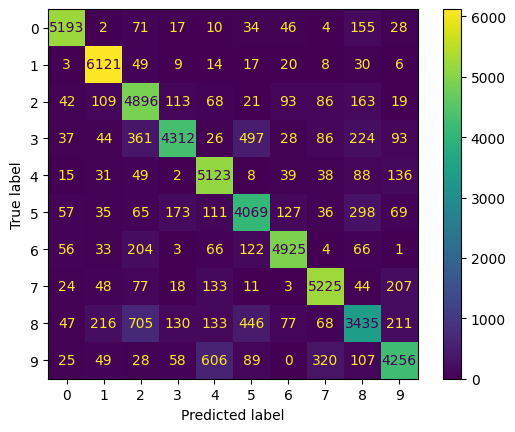

In [53]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

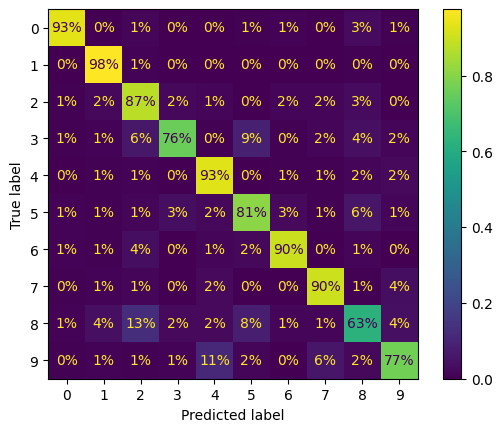

In [66]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', display_labels=sgd_clf.classes_, values_format='.0%')

In [62]:
y_train_pred

array(['5', '4', '5', ..., '1', '0', '0'], dtype='<U1')

In [67]:
samples_weights = (y_train_pred != y_train)

In [68]:
samples_weights

array([False, False,  True, ..., False, False, False])

From the above you can see the column for 8 is really bright that means many images were classified as 8s. In the row #7 and column #9 it means that 37% all missclassified 7s where classified as 9s

Text(0.5, 1.0, 'Error normalised by column')

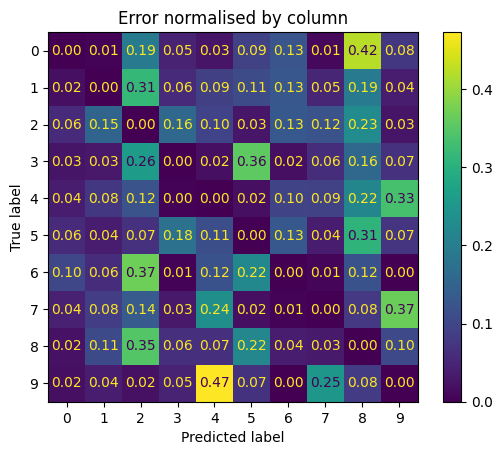

In [80]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=samples_weights, normalize='true', display_labels=sgd_clf.classes_, values_format='.2f')
plt.title("Error normalised by column")

now you can set the erorr by row, so you will get that 52% of missclassified 4s are actually 9s

Text(0.5, 1.0, 'Error normalised by row')

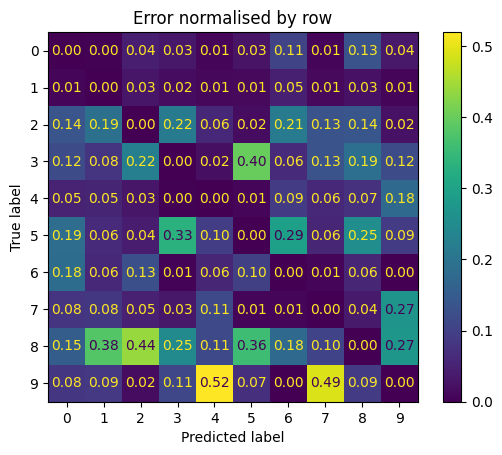

In [82]:

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=samples_weights, normalize='pred', display_labels=sgd_clf.classes_, values_format='.2f')
plt.title("Error normalised by row")

Using this information you can try to improve the model, especially for detecting 8s. For example:
1. get more training data for digits that look like 8s (but are not)
2. feature engineer, for example, writing an algorithm that counts the number of closed loops (e.g. 8 has 2, 6 has 1, 5 has 0)
3. preprocess the images (e.g. using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as closed loops.

The SGDClassifer assigns weight per each pixel and when it sees a new image, it sums the weighted pixel density to get a score for the class.

# multi-label classification

Multi-label classification is used when multiple classes can be present at one time such as in the case where multiple people are present in the same image. 

In [127]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [148]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]


In [129]:
y_multilabel

array([[False,  True],
       [False, False],
       [ True, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [130]:
knn_clf = KNeighborsClassifier()

In [131]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [142]:
y_test_large = (y_test >= 'y')
y_test_odd = (y_test.astype('int8') % 2 == 1)
y_test_multilabel = np.c_[y_test_large, y_test_odd]

In [144]:
knn_clf.score(X_test, y_test_multilabel) # returns the mean accuracy on the given test data and labels

0.6871428571428572

In [149]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

If you want to use classifiers for multi label classifying such as SVC that do not support it, you can use ClassifierChain.

Lets say there are two classes for each instances.

You predict greater than 7 for the first class.

You use the prediction you made for the first class as an input for the second class.

In the second class, you predict whether it is odd or even.

In [152]:
from sklearn.multioutput import ClassifierChain

In [ ]:
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42) 

# chain classifiers takes SVC as base classifier which is a binary classifier and then it will create a chain of classifiers that will be used to predict the multi-labels

In [154]:
chain_clf.fit(X_train, y_multilabel)

In [ ]:
chain_clf.score(X_test, y_test_multilabel)